In [1]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/krichards/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# directory containing fine-tuned model
model_save_path = './ftmodel'

In [3]:
original_model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

In [4]:
fine_tuned_model = SentenceTransformer(model_save_path)

In [5]:
# references: https://www.pinecone.io/learn/sentence-embeddings/
# function to obtain a matrix of cosine similarities for all sentence pairs
def get_similarities(model, sentences):
    embeddings = model.encode(sentences)

    mat = np.zeros((len(sentences), len(sentences)))
    
    for i in range(len(sentences)):
        mat[i:,i] = cos_sim(embeddings[i], embeddings[i:])

    return mat

In [6]:
sentences = [
    'Англійська - не рідна мені мова.', # 'English is not my native language.'
    'English is not my native language.',
    'Мені хочеться щось випити.', # 'I want something to drink.'
    'I am in the mood for something to drink.'
    'Мені потрібна їжа.', # 'I need food.'
    'Can you speak English?',
    'Иногда сложно услышать.' # 'Sometimes it's hard to hear.'
    'Англійська - не моя рідна мова.', # 'English is not my native language.'
    'Я маю настрій чогось випити.', # 'I'm in the mood for something to drink.'
    'Ти вмієш розмовляти англійською?' # 'Can you speak English?'
    'I want something to drink.',
]

<AxesSubplot:>

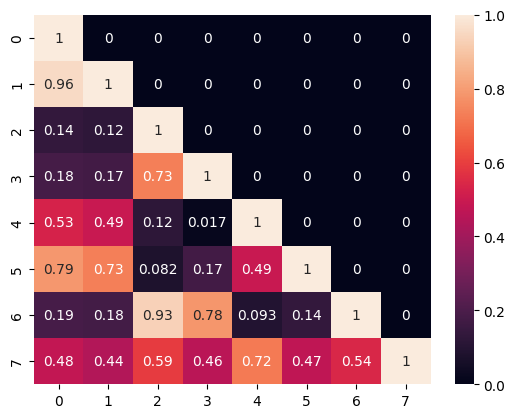

In [7]:
orig_sim = get_similarities(original_model, sentences)
sns.heatmap(orig_sim, annot=True)


<AxesSubplot:>

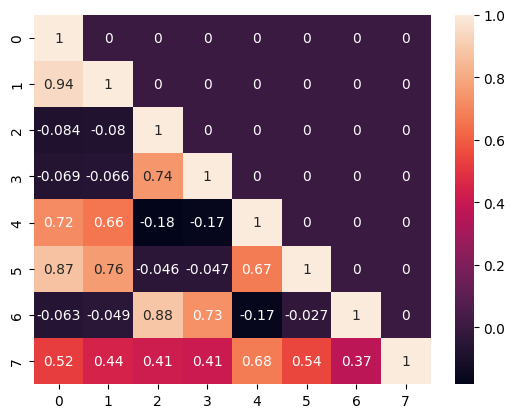

In [8]:
ft_sim = get_similarities(fine_tuned_model, sentences)
sns.heatmap(ft_sim, annot=True)